In [28]:
using Arpack

* https://arxiv.org/pdf/1410.6551.pdf
* https://arxiv.org/pdf/1109.4561.pdf

In [29]:
Nx = 8; Ny = 10; N = Nx*Ny
p = 1; q = Ny
cut_off = Nx
PN = [0,1,2,3]
U = 2;

In [30]:
imp_site_1 = 59
imp_site_2 = 19
V_1 = V_2  = 4;

In [31]:
pn = maximum(PN) # filtered particle number
if V_2 != 0
    N_d = 2 # delocalised quasihole number
else
    N_d = 1
end
if N_d == 2
    D = N_d; # two quasihole pinned
else 
    D = Int( ( factorial(N_d + pn - 1) / ( factorial(N_d) * factorial(pn - 1) ) ) * ( (Nx - N_d) / pn)  ) # gorund state degeneracy
end
D

2

In [32]:
using NBInclude
using LinearAlgebra
@nbinclude("Hofstadter First Band Approximation.ipynb"; regex=r"#.*executeme");

In [33]:
reverse(square_lattice(Nx,Ny)[1], dims=1)

10×8 OffsetArray(::Matrix{Int64}, 0:9, 0:7) with eltype Int64 with indices 0:9×0:7:
 73  74  75  76  77  78  79  80
 65  66  67  68  69  70  71  72
 57  58  59  60  61  62  63  64
 49  50  51  52  53  54  55  56
 41  42  43  44  45  46  47  48
 33  34  35  36  37  38  39  40
 25  26  27  28  29  30  31  32
 17  18  19  20  21  22  23  24
  9  10  11  12  13  14  15  16
  1   2   3   4   5   6   7   8

In [34]:
HHH = (H+H')/2
E, U = eigen(Hermitian(dense(HHH).data), 1:3)
E

3-element Vector{Float64}:
 -10.259869716990439
 -10.259848234628302
 -10.226170246546511

In [35]:
λ, ϕ = eigs(dense(HHH).data, nev=2, which=:SR)
λ

2-element Vector{ComplexF64}:
  -10.25986971699069 - 3.7491404416317366e-17im
 -10.259848234628514 + 8.617577545159854e-17im

In [36]:
function gram_schmidt(matrix)
    # orthogonalises the columns of the input matrix
    num_vectors = size(matrix)[2]
    orth_matrix = zeros(Complex{Float64},size(matrix))
    for vec_idx = 1:num_vectors
        orth_matrix[:, vec_idx] = matrix[:, vec_idx]
        sum = zeros(size(orth_matrix[:, 1]))
        for span_base_idx = 1:(vec_idx-1)
            # compute sum
            sum += dot(orth_matrix[:, span_base_idx], orth_matrix[:, vec_idx])*orth_matrix[:, span_base_idx]
        end
        orth_matrix[:, vec_idx] -= sum
        # normalise vector
        orth_matrix[:, vec_idx] = orth_matrix[:, vec_idx]/norm(orth_matrix[:, vec_idx])
    end
    return orth_matrix
end

gram_schmidt (generic function with 1 method)

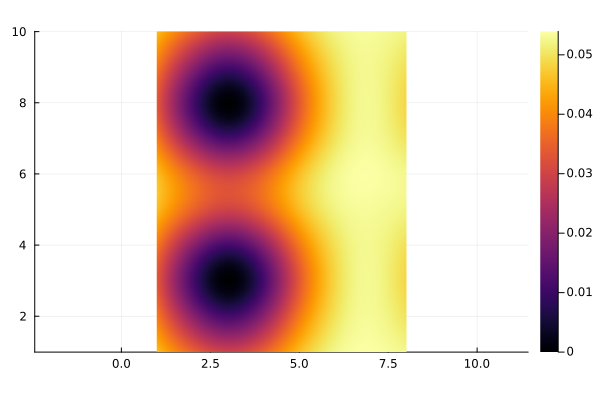

In [37]:
using Plots
using Interpolations

function Interp2D(data, factor)
    IC = CubicSplineInterpolation((axes(data,1), axes(data,2)), data)
    finerx = LinRange(firstindex(data,1), lastindex(data,1), size(data,1) * factor)
    finery = LinRange(firstindex(data,2), lastindex(data,2), size(data,2) * factor)
    nx = length(finerx)
    ny = length(finery)
    data_interp = Array{Float64}(undef,nx,ny)
    for i ∈ 1:nx, j ∈ 1:ny
        data_interp[i,j] = IC(finerx[i],finery[j])
    end
    return finery, finerx, data_interp
end

data = avg_density|>transpose
factor = 50

Plots.heatmap(Interp2D(data, factor), aspect_ratio=:equal)

# Adiabatic 

In [20]:
# PROCESS

# DÖNGÜ 1
H0 = get_total_H(5, 0, imp_site_1, imp_site_2)
E0, U0 = eigen(dense((H0+H0')/2).data)
U0 = U0[:,1:2]

H_tilde_0 = get_total_H(4.9, 0.1, imp_site_1, imp_site_2)
E_tilde_0, U_tilde_0 = eigen(dense((H_tilde_0+H_tilde_0')/2).data)
U_tilde_0 = U_tilde_0[:,1:2]

A_0 = U0'*U_tilde_0
A_inv_0 = inv(A_0)
U_0 = U_tilde_0*A_inv_0

M_0 = cat(U_0[:,1],U_0[:,2],dims=2)
U_new_inital_0 = gram_schmidt(M_0) # Yeni U_initial

# DÖNGÜ 2
H_tilde_1 = get_total_H(4.8, 0.2, imp_site_1, imp_site_2)
E_tilde_1, U_tilde_1 = eigen(dense((H_tilde_1+H_tilde_1')/2).data)
U_tilde_1 = U_tilde_1[:,1:2]

A_1 = U_new_inital_0'*U_tilde_1
A_inv_1 = inv(A_1)
U_1 = U_tilde_1*A_inv_1

M_1 = cat(U_1[:,1],U_1[:,2],dims=2)
U_new_inital_1 = gram_schmidt(M_1) # Yeni U_initial

165×2 Matrix{ComplexF64}:
         0.0+0.0im                 0.0+0.0im
         0.0+0.0im                 0.0+0.0im
         0.0+0.0im                 0.0+0.0im
         0.0+0.0im                 0.0+0.0im
         0.0+0.0im                 0.0+0.0im
         0.0+0.0im                 0.0+0.0im
         0.0+0.0im                 0.0+0.0im
         0.0+0.0im                 0.0+0.0im
         0.0+0.0im                 0.0+0.0im
         0.0+0.0im                 0.0+0.0im
         0.0+0.0im                 0.0+0.0im
         0.0+0.0im                 0.0+0.0im
         0.0+0.0im                 0.0+0.0im
            ⋮              
  0.00969911+0.00408517im    0.0316078+0.00861821im
  -0.0117747+0.0168156im   0.000517468+0.00311882im
 -0.00700528+0.0485745im   -0.00870136+8.45435e-5im
 -0.00919305-0.0142169im   -0.00322574+0.0169719im
  -0.0576067+0.0153535im      0.149443+0.0735807im
  0.00584479-0.00495324im   0.00480629+0.00213115im
  0.00858415-0.0202067im     0.0361509-0.023459im
 

In [21]:
BM = U0'*U_new_inital_1
BM_E, BM_U = eigen(BM)
BM_E
# Siteler birbirine yakın seçince enerji complex part ile geliyor

2-element Vector{ComplexF64}:
 0.07554611104755715 - 1.7970675875250728e-13im
  0.5485467510489135 + 8.8845412527794e-14im

In [38]:
V0 = V_1
dt = 0.001
MobileSites = [59, 60, 61, 62, 22, 21, 20, 19, 54, 46, 38, 30, 22, 27, 35, 43, 51, 59]

H0 = get_total_H(V0, 0, imp_site_1, imp_site_2)
E0, U0 = eigen(Hermitian(dense((H0+H0')/2).data),1:2)
# U0 = U0[:,1:2]

for i in 1:length(MobileSites)-1    
    for (site1,site2) in zip(MobileSites[i], MobileSites[i+1])

        for impurity in range(start=0,stop=V0,step=dt)
            
            impurity1 = round(V0 - impurity, digits=2)
            impurity2 = round(impurity,digits=2)
            
            H_tilde = get_total_H(impurity1, impurity2, imp_site_1, imp_site_2)
            E_tilde, U_tilde = eigen(Hermitian(dense((H_tilde+H_tilde')/2).data),1:2)
            #U_tilde = U_tilde[:,1:2]
            
            A = U0'*U_tilde
            A_inv = inv(A)
            U = U_tilde*A_inv
            
            M = cat(U[:,1], U[:,2],dims=2) # DAHA SONRA GS fonk. içine bunuda al UNUTMA!
            U0 = gram_schmidt(M) # Yeni U_initial

        end
    end
end

U0

165×2 Matrix{ComplexF64}:
          0.0+0.0im                   0.0+0.0im
          0.0+0.0im                   0.0+0.0im
          0.0+0.0im                   0.0+0.0im
          0.0+0.0im                   0.0+0.0im
          0.0+0.0im                   0.0+0.0im
          0.0+0.0im                   0.0+0.0im
          0.0+0.0im                   0.0+0.0im
          0.0+0.0im                   0.0+0.0im
          0.0+0.0im                   0.0+0.0im
          0.0+0.0im                   0.0+0.0im
          0.0+0.0im                   0.0+0.0im
          0.0+0.0im                   0.0+0.0im
          0.0+0.0im                   0.0+0.0im
             ⋮               
   -0.0223369+0.0182651im        0.029039-0.0109102im
  0.000507376-0.0029202im     -0.00166764+0.00551768im
  0.000850089-0.0191622im     0.000757809-0.00132319im
  -0.00170103+0.000534885im  -0.000218277+0.00888592im
    0.0717375+0.0240906im     -0.00763991-0.0135397im
  0.000142134+0.0048274im      0.00316033+3.324

In [39]:
HHA = get_total_H(V0, 0, imp_site_1, imp_site_2)
EEA, UUA = eigen(Hermitian(dense((HHA+HHA')/2).data), 1:2)
UUA

165×2 Matrix{ComplexF64}:
         0.0+0.0im                   0.0+0.0im
         0.0+0.0im                   0.0+0.0im
         0.0+0.0im                   0.0+0.0im
         0.0+0.0im                   0.0+0.0im
         0.0+0.0im                   0.0+0.0im
         0.0+0.0im                   0.0+0.0im
         0.0+0.0im                   0.0+0.0im
         0.0+0.0im                   0.0+0.0im
         0.0+0.0im                   0.0+0.0im
         0.0+0.0im                   0.0+0.0im
         0.0+0.0im                   0.0+0.0im
         0.0+0.0im                   0.0+0.0im
         0.0+0.0im                   0.0+0.0im
            ⋮               
 -0.00469409-0.00512997im      0.0425299-0.0129505im
  -0.0151607+0.0211463im      0.00049773+0.00435742im
 -0.00150221-0.0126071im     0.000334574+0.00556902im
  -0.0116524-0.00886769im     -0.0401181+0.0354976im
   0.0510165+0.00250599im    -0.00373199+0.0104063im
  0.00287089+0.000611815im   -0.00393421-0.00148967im
 0.000191778-

In [40]:
BerryMatrix = UUA'*U0
BerryEnergies, BerryStates = eigen(BerryMatrix)
BerryEnergies

2-element Vector{ComplexF64}:
 0.06751745137042223 - 0.017520062445682175im
 0.06751745162740641 + 0.01752006176187551im

In [46]:
function orthogonality()
    
    vec_set = []
    orth_vec_set = []
    final_orth_vec_set = []
    
    # Her seferinde ikişerli komşulukları (site1 ve site2) belirle
    for i in 1:length(mobile_imp_sites_1_1)-1
        for (site1,site2) in zip(mobile_imp_sites_1_1[i], mobile_imp_sites_1_1[i+1])
            
            println("SITE 1: ",site1,", SITE 2: ",site2, "\n -------------")
            
            # Komşu sitelerdeki imp. potansiyellerin adyabatik değişimi
            for (V1, V2) in zip(adiabatic_V_imp, adiabatic_V_imp_reverse)
                
                println("V_1: ",V1, ", V_2:" ,V2)

                # Komşuluklarda ki her imp. değişiminde öz-vektörleri hesapla
                H, HH_Int = get_total_H(V1, V2, site1, site2, num_mb_list_op, H_Kin, H_Int)
                E, UU = eigen(dense(H).data)
                println("U is Calculated!")

                # Hesaplanan öz-vektörlerin dejenereleri seç ve her adımda bir setde topla 
                vec_set = push!(vec_set, UU[:,1:2]) # Ground degeneracy is 2
                println("length of vec_set: ",length(vec_set))
                
                if lastindex(vec_set) != 1
                    t = vec_set[lastindex(vec_set)-1] # t anında (sondan bir önceki) vektörler
                    t_dt = vec_set[lastindex(vec_set)] # t+dt anında (sonda ki) vektörler
                    println("U_t index: ",lastindex(vec_set)-1,", U_t_dt index: ",lastindex(vec_set))

                    A = t'*t_dt
                    A_inv = inv(A)
                    U = t_dt*A_inv
                    M = cat(U[:,1],U[:,2],dims=2)
                    U_inital = gram_schmidt(M) # Yeni U_initial


                    ###### END ########
                
                    # GRAM-SCHMIDT (D=2 iken)
                    matrix_1 = cat(t,t_dt[:,1],dims=2)
                    orth_t_dt_1 = classical_gram_schmidt_alt(matrix_1)[:,3] # t anında ki her ikisine de dik bir t_dt vektörü
                    matrix_2 = cat(t,t_dt[:,2],dims=2)
                    orth_t_dt_2 = classical_gram_schmidt_alt(matrix_2)[:,3] # t anında ki her ikisine de dik bir diğer t_dt vektörü
                    orth_vec_set = push!(orth_vec_set,cat(orth_t_dt_1, orth_t_dt_2, dims=2)) #t_dt anında, t anına dik vektörler seti
                    println("GS is Completed for ","U_t index: ",lastindex(vec_set)-1,", U_t_dt index: ",lastindex(vec_set))
                    
                    if lastindex(orth_vec_set) != 1
                        println("Length of orth_vec_set: ",length(orth_vec_set))
                        t_dt_prime = orth_vec_set[lastindex(orth_vec_set)-1]
                        println("U_t_dt_prime index: ",lastindex(orth_vec_set)-1)
                        matrix_1_prime = cat(t_dt,t_dt_prime[:,1],dims=2)
                        orth_t_dt_prime_1 = classical_gram_schmidt_alt(matrix_1_prime)[:,3]
                        matrix_2_prime = cat(t_dt,t_dt_prime[:,2],dims=2)
                        orth_t_dt_prime_2 = classical_gram_schmidt_alt(matrix_2_prime)[:,3]
                        final_orth_vec_set = push!(final_orth_vec_set, cat(orth_t_dt_prime_1, orth_t_dt_prime_2, dims=2))
                        println("Prime Vector Set Are Calculated for ", " U_t_dt index: ",lastindex(vec_set), " and ", " U_t_dt_prime index: ",lastindex(orth_vec_set)-1, "\n")
                        println("Length of final_orth_vec_set: ", length(final_orth_vec_set))
                    end
                end
            end
            
        end
    end
    
    return final_orth_vec_set
end

orthogonality (generic function with 1 method)

In [47]:
orthogonality()

SITE 1: 66, SITE 2: 67
 -------------
V_1: 4.0, V_2:0.0
U is Calculated!
length of vec_set: 1
V_1: 3.5555555555555554, V_2:0.4444444444444444
U is Calculated!
length of vec_set: 2
U_t index: 1, U_t_dt index: 2
GS is Completed for U_t index: 1, U_t_dt index: 2
V_1: 3.111111111111111, V_2:0.8888888888888888
U is Calculated!
length of vec_set: 3
U_t index: 2, U_t_dt index: 3
GS is Completed for U_t index: 2, U_t_dt index: 3
Length of orth_vec_set: 2
U_t_dt_prime index: 1
Prime Vector Set Are Calculated for  U_t_dt index: 3 and  U_t_dt_prime index: 1

V_1: 2.6666666666666665, V_2:1.3333333333333333
U is Calculated!
length of vec_set: 4
U_t index: 3, U_t_dt index: 4
GS is Completed for U_t index: 3, U_t_dt index: 4
Length of orth_vec_set: 3
U_t_dt_prime index: 2
Prime Vector Set Are Calculated for  U_t_dt index: 4 and  U_t_dt_prime index: 2

V_1: 2.2222222222222223, V_2:1.7777777777777777
U is Calculated!
length of vec_set: 5
U_t index: 4, U_t_dt index: 5
GS is Completed for U_t index: 4, U

165×2 Matrix{ComplexF64}:
         -0.0+0.0im                  -0.0+0.0im
 -1.18358e-14+7.2195e-14im    -3.2018e-14+3.61596e-14im
  3.22288e-15-1.78641e-14im   2.82627e-14+5.93654e-15im
 -6.07688e-14-1.04877e-13im   -4.2639e-14-4.82834e-14im
   6.5665e-14+4.19228e-14im   2.81459e-14+1.95342e-14im
 -2.84185e-14-7.72533e-15im  -2.10311e-14-1.96312e-14im
  4.43604e-14+1.09841e-13im   2.69663e-14+1.06989e-13im
  8.95919e-14-1.7436e-13im    1.26085e-13-7.30289e-14im
 -5.24274e-14+4.1334e-14im   -1.52705e-14+6.55778e-15im
 -1.05297e-13-2.52023e-13im   3.83136e-14-8.14206e-14im
  -2.6766e-13+3.99513e-13im   1.47594e-13+1.09237e-13im
 -5.07128e-13-2.6214e-13im   -5.10128e-14+2.30832e-13im
 -1.88371e-14-2.89391e-13im  -9.40604e-15+2.28534e-13im
             ⋮               
      0.11634-0.0573687im       0.0135842-0.0289692im
    0.0099876+0.00326825im      0.0146262+0.0235105im
   -0.0015816-0.00272226im    0.000695102-0.00586022im
   0.00781743+0.00614536im    -0.00672994-0.00150535im
   0.0

In [17]:
vec_set[5]

LoadError: UndefVarError: vec_set not defined

In [18]:
# TEST
println(lastindex(vec_set),"\n")
println(final_orth_vec_set[:,1]'*vec_set[lastindex(vec_set)-1][:,1],"\n",
final_orth_vec_set[:,1]'*vec_set[lastindex(vec_set)-1][:,2],"\n",
final_orth_vec_set[:,2]'*vec_set[lastindex(vec_set)-1][:,1],"\n",
final_orth_vec_set[:,2]'*vec_set[lastindex(vec_set)-1][:,2])

LoadError: UndefVarError: vec_set not defined

In [89]:
site_list = [1, 2, 3]
getindex(site_list, 2)

2

In [112]:
for i in 1:length(mobile_imp_sites_1_1)-1
    for (site1,site2) in zip(mobile_imp_sites_1_1[i], mobile_imp_sites_1_1[i+1])
        vec_set = []
        for (V1, V2) in zip(adiabatic_V_imp, adiabatic_V_imp_reverse)
            H_t, HH_Int_t = get_total_H(V1, V2, site_1, site_2, num_mb_list_op, H_Kin, H_Int)
            E_t, U_t = eigen(dense(H_t).data)
            vec_set = push!(vec_set, U_t[:,1:2])
        end
        if getindex(mobile_imp_sites_1_1, site_1) != 1
            pushfirst!(vec_set, FINAL_STATE) # Sıradaki site çiftinin vec_set ilk elemanı, FINAL_STATE olmalı!
        end
        orth_vec_set = []
        matrix_1 = cat(vec_set[1],vec_set[2][:,1],dims=2)
        orth_1 = classical_gram_schmidt_alt(matrix_1)[:,3] 
        matrix_2 = cat(vec_set[1],vec_set[2][:,2],dims=2)
        orth_2 = classical_gram_schmidt_alt(matrix_2)[:,3]
        orth_vec_set = push!(orth_vec_set,cat(orth_1, orth_2, dims=2))
        for i in 1:length(vec_set)-2
            M1 = cat(orth_vec_set[i],vec_set[i+2][:,1],dims=2)
            MM1 = classical_gram_schmidt_alt(M1)[:,3] 
            M2 = cat(orth_vec_set[i],vec_set[i+2][:,2],dims=2)
            MM2 = classical_gram_schmidt_alt(M2)[:,3]
            final_state = cat(MM1, MM2, dims=2)
            orth_vec_set = push!(orth_vec_set, final_state)
        end
        FINAL_STATE = orth_vec_set[length(orth_vec_set)] # Bir sonraki site çiftinin adyabatik başlangıç durumu olmak zorunda!
    end
end

In [113]:
FINAL_STATE

165×2 Matrix{ComplexF64}:
          0.0+0.0im                   0.0+0.0im
  1.05094e-17+7.63161e-17im   1.48411e-17-8.05311e-17im
  2.20677e-16-1.98881e-16im  -2.22242e-16-1.69031e-16im
 -1.57089e-17-4.38967e-17im   2.52124e-16+1.64001e-16im
  -8.4451e-18+9.39706e-16im   7.22092e-16-6.26255e-16im
 -3.72362e-16+5.62975e-16im   7.29911e-16+3.5823e-16im
 -5.64457e-17-1.45656e-16im  -3.50142e-16-2.87016e-16im
 -4.79477e-16-2.99097e-16im   -2.9643e-16+5.71317e-16im
  4.01262e-16-3.74433e-16im  -3.65594e-16-5.78753e-16im
  2.01977e-16-8.36754e-16im  -8.55762e-16+2.46933e-16im
     -7.1e-17+5.40643e-16im   2.44885e-15+9.08703e-18im
 -3.59915e-16+1.15989e-15im   2.83119e-16+6.84247e-16im
  1.70661e-16-2.97994e-16im   4.43958e-16+4.77243e-17im
             ⋮               
   0.00985056-0.000568463im  -0.000864228-0.000400616im
   0.00328617+0.000152366im   -0.00588264+0.00468113im
    0.0160292+0.0315774im       -0.015115+0.0182321im
   -0.0036958-0.0192223im     -0.00082828+0.000946822im
    

In [19]:
U_inital[:,1:2]

165×2 Matrix{ComplexF64}:
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
            ⋮               
   0.0184847-0.013519im       0.0106239-0.0025215im
 -0.00129949+0.0011011im     0.00256097-0.00191017im
 -0.00197894+0.0251335im      0.0258191+0.0344705im
 -0.00795775-0.00184203im   -5.76361e-5+0.0139363im
   0.0723174+0.120511im       0.0351638+0.147732im
    0.010675-0.00894823im   -0.00284431-0.000702726im
  -0.0275391+0.000268849im    0.0

In [20]:
U[:,1:2]

165×2 Matrix{ComplexF64}:
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
         0.0-0.0im                  0.0-0.0im
            ⋮               
   0.0184847-0.013519im       0.0106239-0.0025215im
 -0.00129949+0.0011011im     0.00256097-0.00191017im
 -0.00197894+0.0251335im      0.0258191+0.0344705im
 -0.00795775-0.00184203im   -5.76361e-5+0.0139363im
   0.0723174+0.120511im       0.0351638+0.147732im
    0.010675-0.00894823im   -0.00284431-0.000702726im
  -0.0275391+0.000268849im    0.0

In [127]:
U_inital[:,1]'*U[:,2]

0.07225081195612147 + 0.12514297438534613im

In [25]:
orth_vec_sett = []
orth_vec_sett = cat(U_inital[:,1:2], U[:,1:2], dims=2)

165×4 Matrix{ComplexF64}:
         0.0-0.0im          …          0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im          …          0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im          …          0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im                     0.0-0.0im
            ⋮               ⋱  
   0.0184847-0.013519im          0.0106239-0.0025215im
 -0.00129949+0.0011011im        0.00256097-0.00191017im
 -0.00197894+0.0251335im    …    0.0258191+0.0344705im
 -0.00795775-0.00184203im      -5.76361e-5+0.0139363im
   0.0723174+0.120511im          0.0351638+0.147732im
    0.010675-0.00894823im     

In [186]:
ort_vec_set = classical_gram_schmidt_alt(vec_set)

165×4 Matrix{ComplexF64}:
         0.0-0.0im         …           0.0+0.0im
         0.0-0.0im             2.82001e-17-2.69323e-17im
         0.0-0.0im            -1.32778e-17+2.16486e-17im
         0.0-0.0im             7.66009e-17-1.17784e-17im
         0.0-0.0im             1.13068e-16+1.40945e-17im
         0.0-0.0im         …  -1.38853e-16+8.90432e-17im
         0.0-0.0im            -5.39032e-18+3.62077e-17im
         0.0-0.0im             8.44692e-17-1.33181e-16im
         0.0-0.0im             6.52678e-17+1.56824e-17im
         0.0-0.0im             1.38823e-17-2.6051e-17im
         0.0-0.0im         …  -1.01909e-16+5.95945e-19im
         0.0-0.0im            -3.27172e-17+8.26401e-18im
         0.0-0.0im            -2.55572e-16+1.05891e-17im
            ⋮              ⋱  
   0.0151057-0.0210881im         0.0210551+0.0375611im
 -0.00490167-0.0107593im       -0.00460685+0.00163592im
    0.085328+0.0678444im   …    -0.0120553+0.00335973im
  0.00948034-0.00247212im        0.0388555+0

In [189]:
ort_vec_set[:,1]'*ort_vec_set[:,4]

4.163336342344337e-17 - 1.0408340855860843e-17im

In [32]:
A = []
A = push!(A,orth_vec_sett)
A[1]

165×4 Matrix{ComplexF64}:
         0.0-0.0im          …          0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im          …          0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im          …          0.0-0.0im
         0.0-0.0im                     0.0-0.0im
         0.0-0.0im                     0.0-0.0im
            ⋮               ⋱  
   0.0184847-0.013519im          0.0106239-0.0025215im
 -0.00129949+0.0011011im        0.00256097-0.00191017im
 -0.00197894+0.0251335im    …    0.0258191+0.0344705im
 -0.00795775-0.00184203im      -5.76361e-5+0.0139363im
   0.0723174+0.120511im          0.0351638+0.147732im
    0.010675-0.00894823im     